In [ ]:
# test simon's code in https://github.com/DrSOKane/PyBaMM/blob/GITT_example/examples/notebooks/GITT-charge.ipynb

In [1]:
import pybamm as pb;

In [6]:
import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'

In [10]:
2.5*288*100/3600

20.0

In [9]:
model = pb.lithium_ion.DFN(
    options={
        "particle": "Fickian diffusion", 
        "SEI":"interstitial-diffusion limited", 
        "SEI film resistance":"distributed", 
        "SEI porosity change":"true",
        "lithium plating":"partially reversible"
    }
)
chemistry = pb.parameter_sets.Chen2020_coupled
parameter_values = pb.ParameterValues(chemistry=chemistry)
parameter_values.update({"Ambient temperature [K]": 318.15})
parameter_values.update({"Initial concentration in negative electrode [mol.m-3]": 28708})
#parameter_values.update({"Lithium plating kinetic rate constant [m.s-1]": 1E-8})

exp1 = pb.Experiment(["Discharge at C/20 until 2.5V (5 minute period)", "Rest for 1 hour (5 minute period)"])

exp2 = pb.Experiment(
    [("Charge at 0.5C for 288 seconds or until 4.2V (1 second period)", 
    "Rest for 3660 seconds (1 second period)")] * 100,
)

sim1 = pb.Simulation(model, parameter_values=parameter_values, experiment=exp1)
solution1 = sim1.solve()
model.set_initial_conditions_from(solution1)
sim2 = pb.Simulation(model, parameter_values=parameter_values, experiment=exp2)
solution2 = sim2.solve()

In [4]:
t = solution2["Time [h]"].entries
I = solution2["Current [A]"].entries
Q = solution2["Discharge capacity [A.h]"].entries
V = solution2["Terminal voltage [V]"].entries
Vn = solution2["Negative electrolyte potential [V]"].entries[-1,:]
Vp = solution2["Positive electrolyte potential [V]"].entries[0,:]
cs_sep = solution2["Negative particle surface concentration"].entries[-1,:]

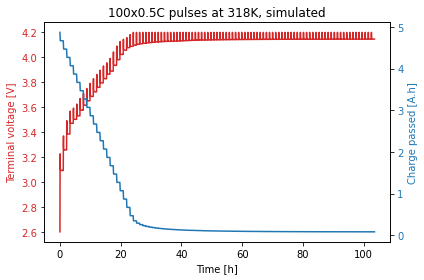

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time [h]')
ax1.set_ylabel('Terminal voltage [V]', color=color)
ax1.set_title('100x0.5C pulses at 318K, simulated')
ax1.plot(t, V, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Charge passed [A.h]', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Q, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped